## Python Numpy 선형대수

- 단위행렬 (Unit matrix): np.eye(n)
- 대각행렬 (Diagonal matrix): np.diag(x)
- 내적 (Dot product, Inner product): np.dot(a, b)
- 대각합 (Trace): np.trace(x)
- 행렬식 (Matrix Determinant): np.linalg.det(x)
- 역행렬 (Inverse of a matrix): np.linalg.inv(x)
- 고유값 (Eigenvalue), 고유벡터 (Eigenvector): w, v = np.linalg.eig(x)
- 특이값 분해 (Singular Value Decomposition): u, s, vh = np.linalg.svd(A)
- 연립방정식 해 풀기 (Solve a linear matrix equation): np.linalg.solve(a, b)
- 최소자승 해 풀기 (Compute the Least-squares solution): m, c = np.linalg.lstsq(A, y, rcond=None)[0]

https://rfriend.tistory.com/380


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 정방행렬 (=정사각형 행렬. nxn)
np.arange(9).reshape(3,3)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [3]:
# 대각 정방행렬: 주 대각선 원소 외의 다른 원소는 모두 0인 정방행렬
np.diag([1,2,3,4])

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

In [4]:
# 단위행렬 or 항등행렬: 주 대각선 원소가 1인 대각정방행렬
# 행렬 내적에서 항등원으로 작용한다. 마치 1을 곱한 것과 같이, 곱해도 피승수가 나오는 행렬.
display(np.eye(4),
        np.identity(4))

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

#### 벡터와 행렬의 연산
- 벡터/행렬의 덧셈과 뺄셈 : 같은 위치에 있는 원소끼리 수행. 요소별 연산
- 스칼라와 벡터/행렬의 곱셈
- 브로드캐스팅 : 스칼라를 벡터로 변환한 연산을 허용
- 벡터와 벡터의 곱셈. 내적
 - 두 벡터의 차원(길이)이 같아야 한다.
 - 앞의 벡터가 행벡터이고 위의 벡터가 열벡터여야 한다.
 - 내적의 결과는 스칼라 값이 됨. dot() 또는 @ 연산자로 계산


In [5]:
scalar = 5
vector = [1,2,3]
matrix = [[1,2,3],[4,5,6]]
# 이 모든 것은 텐서라고 칭할 수도 있다.
# 텐서: 같은 크기의 행렬이 여러 개 같이 묶여 있는 것. 쉽게 말해 다차원 배열.

#### 쬬교's comment
벡터 개념을 다차원으로 끌고가기 위한 정의가 텐서이고,  
이렇게 정의하면 0차원 텐서는 스칼라, 1차원 텐서는 벡터,  
2차원 텐서는 공간벡터 등으로 설명될 수 있다.  
  
3차원 텐서부터는 정해진 이름이 없습니다.  
마치 4차원을 표현할 수 없는 것처럼요.  
수리물리학에서는 N차 텐서로 표현했던 듯합니다.  
아까 텐서 설명에 제가 2차 텐서부터 공간벡터로 말씀드림은.  
면부터는 공간의 개념이 들어가기 때문에 그랬습니다.  
1차 텐서는 확실히 벡터 개념이나, 그 이상부터는 엄밀히 말하면 n차 텐서로 표현해야 합니다.  
텐서의 완전한 이해는 조금 어려우실 수 있어서 우선 느낌으로 받아들이시고 가시는 게 좋아보입니다.


In [6]:
x = np.array([10,11,12,13,14])
y = np.array([0,1,2,3,4])
print(x+y, x-y)

[10 12 14 16 18] [10 10 10 10 10]


In [7]:
a = np.array([[5,6],[7,8]])
b = np.array([[10,20],[30,40]])
c = np.array([[1,2],[3,4]])
a+b-c

array([[14, 24],
       [34, 44]])

In [8]:
# 브로드캐스팅
display(a+3, b/10, c*2) 

array([[ 8,  9],
       [10, 11]])

array([[1., 2.],
       [3., 4.]])

array([[2, 4],
       [6, 8]])

행렬 곱을 응용하여 신경망에 적용  
두 번째 행렬을 '가중치'라고 생각하면  
화살표 위의 숫자가 두 번째 행렬, 즉 가중치
<img src='행렬곱.jpg' width=300px>

In [9]:
x = np.array([2,6,4,8,5,9]).reshape(2,3)
y = np.array([[3,7],[5,2],[-2,6]])
np.dot(x,y)

array([[ 28,  50],
       [ 31, 120]])

In [10]:
# 행렬의 내적은 np.dot() 말고도 @를 써도 가능하답니다
x@y

array([[ 28,  50],
       [ 31, 120]])

In [11]:
x = np.array([[1],[2],[3]]) # (3,1) 벡터
y = np.array([[4],[5],[6]])
display(x.T@y, x@y.T)
# x.T@y → (1,3)*(3,1) = (1,1)
# x@y.T → (3,1)*(1,3) = (3,3)

array([[32]])

array([[ 4,  5,  6],
       [ 8, 10, 12],
       [12, 15, 18]])

In [12]:
# 1차원 ndarray는 전치연산이 정의되지 않는다.
x = np.array([1,2,3])
print(x.shape, x.T)

(3,) [1 2 3]


In [13]:
x = np.array([1,2,3])
y = np.array([4,5,6])
x@y # (3,)*(3,)=(1,)

32

In [14]:
# 주식가격 p, 주식 수 n일 때 매수 금액을 내적으로 구해 보자.
p = np.array([100,80,50])
n = np.array([3,4,5])
print(f'총 매수금액: {p@n}원')

총 매수금액: 870원


[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
(8, 8)
[0.]


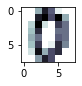

In [15]:
from sklearn.datasets import load_digits
import matplotlib.gridspec as gridspec

digits = load_digits()
d1 = digits.images[0]
print(d1)
print(d1.shape)
v1 = d1.reshape(64,1)
print(v1[0,:])
plt.figure(figsize=(1,1))
plt.imshow(d1, aspect=1,
          interpolation='nearest', cmap=plt.cm.bone_r)
plt.show()

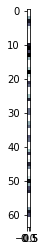

In [16]:
# 64 길이의 1차원 벡터로 펼쳐보자.
plt.imshow(v1, aspect=1,
          interpolation='nearest', cmap=plt.cm.bone_r)
plt.show()

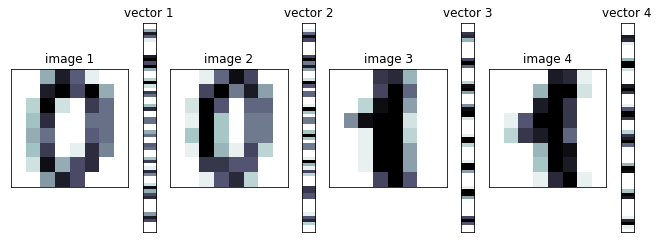

In [17]:
from sklearn.datasets import load_digits
import matplotlib.gridspec as gridspec

digits = load_digits()
d1 = digits.images[0] # 1번째 0 손글씨
d2 = digits.images[10] # 2번째 0 손글씨
d3 = digits.images[1] # 1번째 1 손글씨
d4 = digits.images[11] # 2번째 1 손글씨
v1 = d1.reshape(64, 1)
v2 = d2.reshape(64, 1)
v3 = d3.reshape(64, 1)
v4 = d4.reshape(64, 1)

plt.figure(figsize=(9, 9))
gs = gridspec.GridSpec(1, 8, height_ratios=[1],
                       width_ratios=[9, 1, 9, 1, 9, 1, 9, 1])
for i in range(4):
    plt.subplot(gs[2 * i])
    plt.imshow(eval("d" + str(i + 1)), aspect=1,
               interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title("image {}".format(i + 1))
    plt.subplot(gs[2 * i + 1])
    plt.imshow(eval("v" + str(i + 1)), aspect=0.25,
               interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title("vector {}".format(i + 1))
plt.tight_layout()
plt.show()


In [18]:
v1.T

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [19]:
v1.T@v3

array([[1866.]])

In [20]:
(v1@v3.T).shape

(64, 64)

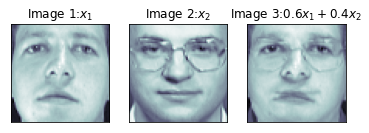

In [21]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()

fig, ax = plt.subplots(1,3)

ax[0].imshow(faces.images[6], cmap = plt.cm.bone)
ax[0].grid(False)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title('Image 1:$x_1$')

ax[1].imshow(faces.images[53], cmap = plt.cm.bone)
ax[1].grid(False)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title('Image 2:$x_2$')

new_face = 0.6*faces.images[6] + 0.4*faces.images[53]
ax[2].imshow(new_face, cmap = plt.cm.bone)
ax[2].grid(False)
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[2].set_title('Image 3:$0.6x_1+0.4x_2$')

plt.show()

In [22]:
# 행렬과 행렬의 곱셈: 앞행 열의 수와 뒷행 행의 수가 일치해야 가능함

#### 행렬의 교환 법칙과 분배 법칙
    행렬의 곱셈은 곱하는 행렬의 순서를 바꾸는 교환 법칙이 성립하지 않는다.
    그러나 덧셈, 뺄셈에 대한 분배법칙은 성립한다.
$AB\neq BA$  
$A(B+C)=AB+AC$  
$(A+B)C=AC+BC$  

In [33]:
# [연습문제] 행렬 곱셈의 교환법칙과 분배법칙의 사례를 보여주세요.
a = np.arange(1,5).reshape(2,2)
b = np.arange(5,9).reshape(2,2)
c = np.arange(9,5,-1).reshape(2,2)

display(a@b, b@a, a@(b+c), a@b+a@c, (a-b)@c, a@c-b@c)

array([[19, 22],
       [43, 50]])

array([[23, 34],
       [31, 46]])

array([[42, 42],
       [98, 98]])

array([[42, 42],
       [98, 98]])

array([[-64, -56],
       [-64, -56]])

array([[-64, -56],
       [-64, -56]])

In [34]:
# [연습문제] 어떤 행렬이든 항등행렬을 곱하면 그 행렬의 값은 변하지 않는다는 사례를 보여주세요.
display(a@np.eye(2), np.eye(2)@a)

array([[1., 2.],
       [3., 4.]])

array([[1., 2.],
       [3., 4.]])

#### 전치 연산의 분배법칙
    전치 연산에서도 덧셈, 뺄셈에 대한 분배 법칙이 성립하지만,
    곱셈의 경우 전치 연산이 분배되면서 곱셈의 순서가 바뀜에 늘 유의하자.
$(A+B)^T=A^T+B^T$  
$(AB)^T=B^TA^T$  
$(ABC)^T=C^TB^TA^T$

In [31]:
# 위의 명제 검증
display((a+b).T, a.T+b.T, (a@b@c).T, c.T@b.T@a.T)

array([[ 6, 10],
       [ 8, 12]])

array([[ 6, 10],
       [ 8, 12]])

array([[325, 737],
       [284, 644]])

array([[325, 737],
       [284, 644]])

#### 행렬 놈(노름, norm)
- 벡터의 놈은 다음 4가지 성질을 만족하면서 벡터에서 실수 값을 연결하는 함수로 정의하고, \||x||로 표기한다.

           1. ||x||은 음수가 아닌 실수값이다. 즉, ||x||>=0
           2. x = 0일때만 ||x|| = 0 이다.
           3. 스칼라 a에 대해서 ||ax|| = |a|||x|| 가 성립한다.
           4. ||x+y|| <= ||x|| + ||y|| 이 성립한다..

- 위 4가지 성질을 만족하기만 하면 놈이라고 할 수 있는데, 많이 사용되는 놈은 다음 세 가지이다. 놈을 구별하기 위하여 아래 첨자를 사용하고, $||x||_1$을 1-놈, $||x||_2$ 를 2-놈, $||x||_\infty$를 3-놈이라고 한다.
- 1-놈($L_1 norm$)은 벡터 $x$의 성분의 절대값을 모두 더한 것(맨해튼 거리, 맨해튼 놈)으로,  
2-놈($L_2 norm$)은 벡터의 기하학적 길이(유클리드 거리, 유클리드 놈)로,  
$\infty$-놈($L_\infty norm$)은 벡터 성분 중에서 크기가 제일 큰 값으로 정의한다.
- p = 2인 경우가 가장 많이 쓰이므로 p값 표기가 없는 경우 p=2인 프로베니우스 놈을 사용한다.
- numpy에서는 linalg 서브패키지의 norm() 명령어로 연산 가능.

https://bskyvision.com/825  
https://pasus.tistory.com/34  
https://jimmy-ai.tistory.com/81

In [35]:
A = (np.arange(9)-4).reshape(3,-1)
A

array([[-4, -3, -2],
       [-1,  0,  1],
       [ 2,  3,  4]])

In [37]:
# linalg - linear algebra의 준말이라 생각하면 외우지 않아도 이해할 수 있다.
np.linalg.norm(A)

7.745966692414834

In [39]:
# 따로 p값을 지정 안 해주면 유클리드 거리로 계산한다. 피타고라스 정리처럼.
np.linalg.norm([3,4])

5.0

#### 대각합
    정방행렬에서만 정의되는, 대각원소들의 합
tr$(cA)=c$ tr$(A)$


In [40]:
np.trace(np.eye(3))

3.0

#### 행렬식

https://ratsgo.github.io/linear%20algebra/2017/05/21/determinants/  
https://www.youtube.com/watch?v=fuVMiyahzH4

In [46]:
A_ = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(A_)
np.linalg.det(A_)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


6.66133814775094e-16

In [55]:
print(1*(45-48)-2*(36-42)+3*(32-35)) # 1행을 기준
print(1*(45-48)-4*(18-24)+7*(12-15)) # 1열을 기준
# 행렬식은 어떤 행, 렬을 기준으로 잡아도 그 값이 같다.
# 수기로 구할 때는 부호가 왔다리 갔다리 하는 걸로 이해하면 됨
# -1의 (n+1)승이라서.

0
0


#### 선형 연립방정식
- 선형예측모형은 입력 데이터 벡터와 가중치 벡터의 내적으로 계산된 예측값이 실제 출력 데이터와 유사한 값을 출력하도록 하는 모형
- 연립방정식과 역행렬을 이용하여 선형 예측 모형의 가중치 벡터를 구할 수 있다.  

#### 역행렬
- 정방행렬에 대한 역행렬은 원래의 행렬과 다음 관계를 만족하는 정방행렬을 의미  
$A^{-1}A = AA^{-1} = I$ (여기서 $I$는 항등행렬)


In [48]:
np.random.seed(0)
mt1 = np.random.randint(1,4,size=(3,3))
print(mt1)
mt2 = np.linalg.inv(mt1)
print(mt2)

[[1 2 1]
 [2 2 3]
 [1 3 1]]
[[ 7. -1. -4.]
 [-1.  0.  1.]
 [-4.  1.  2.]]


In [49]:
mt1@mt2

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

#### np.dot()과 np.matmul()의 차이
https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=cjh226&logNo=221356884894
<img src='matmul.png'>

In [51]:
display(np.dot(mt1, mt2), np.matmul(mt1,mt2))

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [50]:
# np.dot() vs. np.matmul()
a1 = np.arange(18).reshape(3,2,3)
a2 = np.arange(18).reshape(3,3,2)
print(a1)
print(a2)

[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]

 [[12 13 14]
  [15 16 17]]]
[[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]

 [[12 13]
  [14 15]
  [16 17]]]


In [54]:
# 2차원에서는 두 함수가 결과값이 같았지만 3차원 이상부터는 얘기가 달라진다.
display(np.dot(a1,a2), np.matmul(a1,a2))
display(np.dot(a1,a2).shape, np.matmul(a1,a2).shape)
# 전자의 경우 3차원 곱이 4차원이 되었고, 후자는 차원이 유지됨.

array([[[[ 10,  13],
         [ 28,  31],
         [ 46,  49]],

        [[ 28,  40],
         [100, 112],
         [172, 184]]],


       [[[ 46,  67],
         [172, 193],
         [298, 319]],

        [[ 64,  94],
         [244, 274],
         [424, 454]]],


       [[[ 82, 121],
         [316, 355],
         [550, 589]],

        [[100, 148],
         [388, 436],
         [676, 724]]]])

array([[[ 10,  13],
        [ 28,  40]],

       [[172, 193],
        [244, 274]],

       [[550, 589],
        [676, 724]]])

(3, 2, 3, 2)

(3, 2, 2)